# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import os
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# Mount personal Google Drive
from google.colab import drive
root_dir = '/content/drive'
drive.mount(root_dir)

Mounted at /content/drive


In [ ]:
# Define the sub-directory where the data is located
drive_subdir = 'MyDrive/DataScienceCourse/PythonFoundations/Project1'

# Define the name of the CSV file containing the dataset
file_name = 'foodhub_order.csv'

# Construct the full path to the datafile
file_path = os.path.join(root_dir, drive_subdir, file_name)

# Load the datafile into a dataframe
df = pd.read_csv(file_path)

In [ ]:
# Preview the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Access shape property of the df to get the number of rows and cols
num_rows = df.shape[0]
num_cols = df.shape[1]

# Print the answer
print(f'The dataset contains {num_rows} rows and {num_cols} columns')

The dataset contains 1898 rows and 9 columns


#### Observations:
- The data has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Display a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- There are attributes of different types (*int*, *float*, *object*) in the data
- The Non-Null count of each column is equal to the size of the dataframe, meaning there are no null values
- The field "rating" is being interpeted as a string-type column, but it should be numeric

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check why rating is stored as object-type
unique_ratings = df['rating'].unique()
print(f'Unique ratings: {unique_ratings}')

Unique ratings: ['Not given' '5' '3' '4']


In [ ]:
# Replace 'Not given' entries as NaN and convert column-type to float
df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'] = df['rating'].astype(float)

# Check new unique ratings
unique_ratings = df['rating'].unique()
print(f'Unique ratings: {unique_ratings}')

Unique ratings: [nan  5.  3.  4.]


#### Observations:
- The dataset contains missing data int the "rating" column that takes the form of a 'Not given' string
- We can treat this missing data by replacing these entries as NaNs and converting the column type to float64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Print a statistical summary of the full dataset
summary = df.describe(include='all')
# print(summary, '\n')

# Loop over the requested statistics
for stat in 'min mean max'.split():

  # For each stat, grab the associated value and print to the console
  print(f'{stat.upper().ljust(4)} prep time:  {summary["food_preparation_time"].loc[stat]:.2f} minutes')


MIN  prep time:  20.00 minutes
MEAN prep time:  27.37 minutes
MAX  prep time:  35.00 minutes


#### Observations:
- The minimum prep time is 20.00 minutes
- The average prep time is 27.37 minutes
- The maximum prep time is 35.00 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Compute the boolean sum of all non-NaN ratings
num_unrated = df['rating'].isna().sum()

# Print answer
print(f'Total unrated orders: {num_unrated}')

Total unrated orders: 736


#### Observations:
- There are 736 orders with no rating given

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# (1) Order IDs
num_unique_orders = df['order_id'].nunique()
print(f'There are {num_unique_orders} unique orders placed in the dataset')

There are 1898 unique orders placed in the dataset


In [ ]:
# (2) Customer IDs
num_unique_customers = df['customer_id'].nunique()
print(f'There are {num_unique_customers} unique customers in the dataset')

There are 1200 unique customers in the dataset


In [ ]:
# (3) Restaurant Names
num_unique_restaurants = df['restaurant_name'].nunique()
print(f'There are {num_unique_restaurants} unique restaurants in the dataset')

There are 178 unique restaurants in the dataset


There are 14 unique cuisines in the dataset


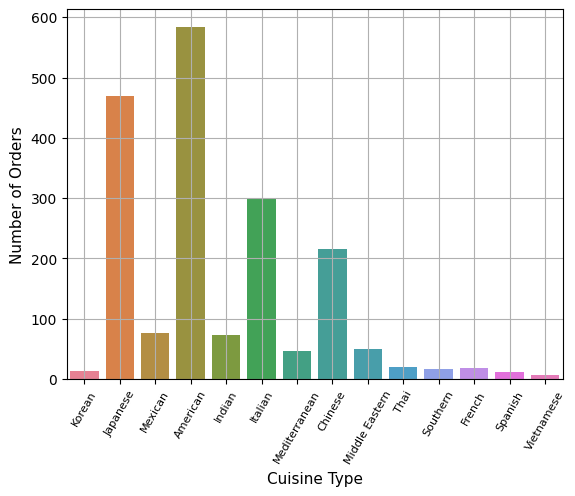

In [ ]:
# (4) Cuisine Type
target_col = 'cuisine_type'

num_unique_cuisines = df[target_col].nunique()
print(f'There are {num_unique_cuisines} unique cuisines in the dataset')

sns.countplot(data=df, x=target_col, hue=target_col)
label_size = 11
plt.xlabel(' '.join(target_col.split('_')).title(), fontsize=label_size)
plt.ylabel('Number of Orders', fontsize=label_size)
plt.xticks(rotation=60, fontsize=8)
plt.grid(True)
plt.show()


###Observations on Cuisine Type
- The most popular cuisines in the dataset are American, Japanese, Italian, and Chinese


count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64



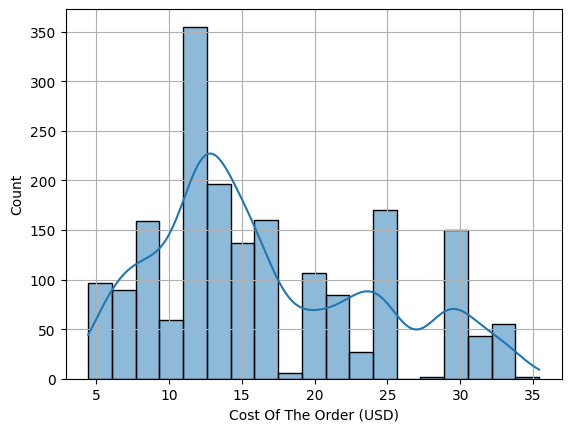

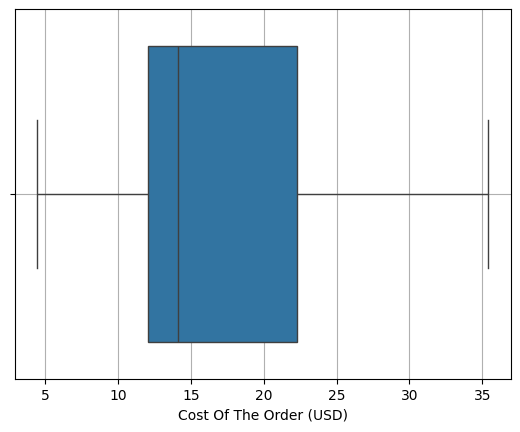

In [ ]:
# (5) Cost of the Order
target_col = 'cost_of_the_order'
print(df[target_col].describe())
print()

# Histogram
sns.histplot(data=df, x=target_col, kde=True)
xlabel = ' '.join(target_col.split('_')).title() + ' (USD)'
plt.xlabel(xlabel)
plt.grid(True)
plt.show()

# Boxplot
sns.boxplot(data=df, x=target_col)
plt.xlabel(xlabel)
plt.grid(True)
plt.show()

###Observations on Cost of the Order
- The median order cost is \$14.14
- The mean order cost is \$16.49
- The order costs range from \$4.47 to \$35.41
- The distribution has at least three distinct modes

                count unique      top  freq
day_of_the_week                            
Weekday           547      1  Weekday   547
Weekend          1351      1  Weekend  1351



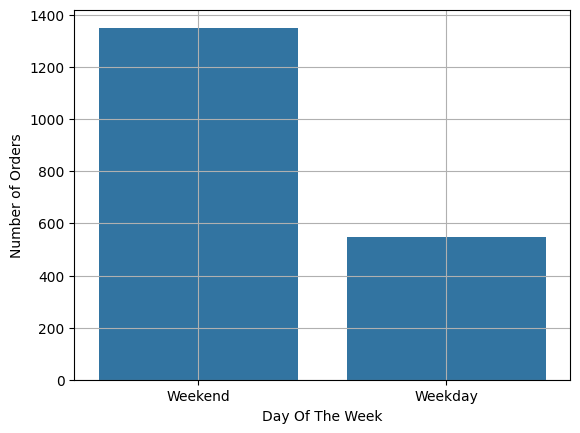

In [ ]:
# (6) Day of the Week
target_col = 'day_of_the_week'
print(df.groupby(target_col)[target_col].describe())
print()

sns.countplot(data=df, x=target_col)
plt.xlabel(' '.join(target_col.split('_')).title())
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

### Observations on Day of the Week
- Customers are ordering more food on the weekends
- There are 1351 weekend orders and 547 weekday orders

count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

rating
3.0    188
4.0    386
5.0    588
Name: rating, dtype: int64



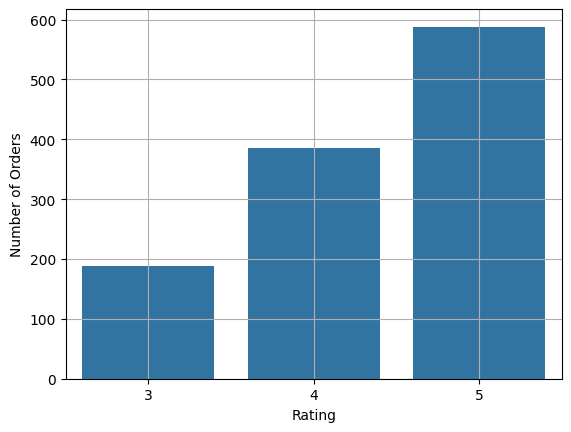

In [ ]:
# (7) Rating
target_col = 'rating'
print(df[target_col].describe())
print()
print(df.groupby(target_col)[target_col].count())
print()

h = sns.countplot(data=df, x=target_col)
h.set_xticks(h.get_xticks())  # Only required to suppress warning
h.set_xticklabels([int(float(x.get_text())) for x in h.get_xticklabels()])
plt.xlabel(' '.join(target_col.split('_')).title())
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

###Observations on Rating
- The average rating is 4.344
- The median rating is 5
- The ratings range from 3 to 5
- There are 588 5-star ratings, 386 4-star ratings, and 188 3-star ratings

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64



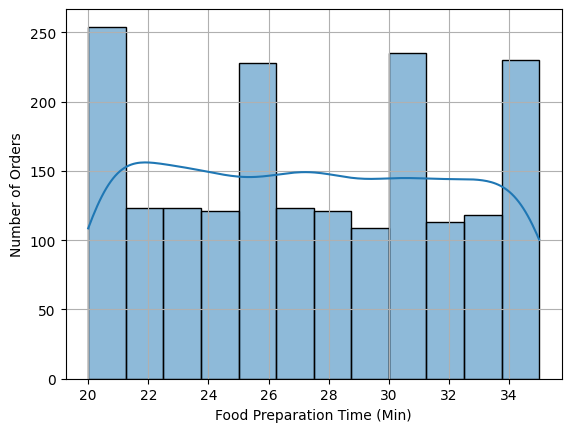

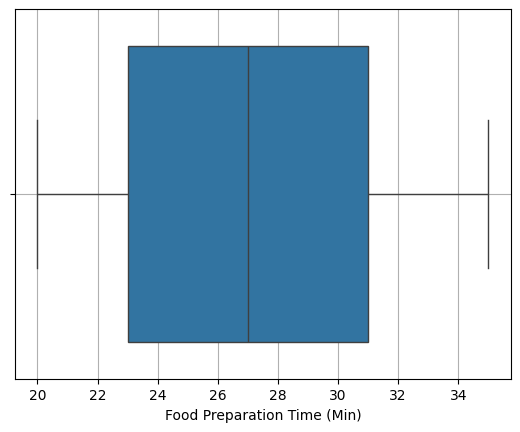

In [ ]:
# (8) Food Preparation Time
target_col = 'food_preparation_time'
print(df[target_col].describe())
print()

sns.histplot(data=df, x=target_col, kde=True)
xlabel = ' '.join(target_col.split('_')).title() + ' (Min)'
plt.xlabel(xlabel)
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

sns.boxplot(data=df, x=target_col)
plt.xlabel(xlabel)
plt.grid(True)
plt.show()

###Observations on Food Preparation Time
- The average food prep time is 27.4-minutes
- The median food prep time is 27-minutes
- The food prep times range from 20-minutes to 35-minutes
- The data is roughly uniformly distributed

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64



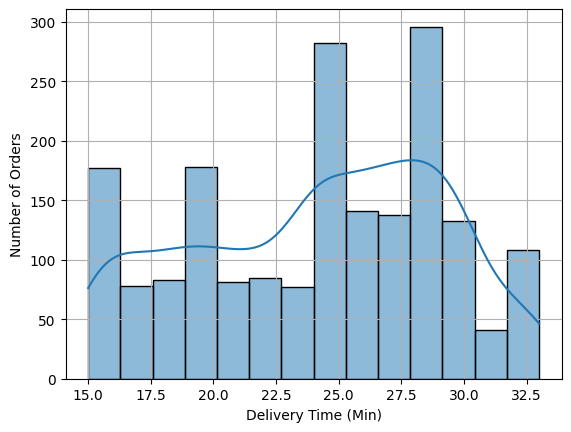

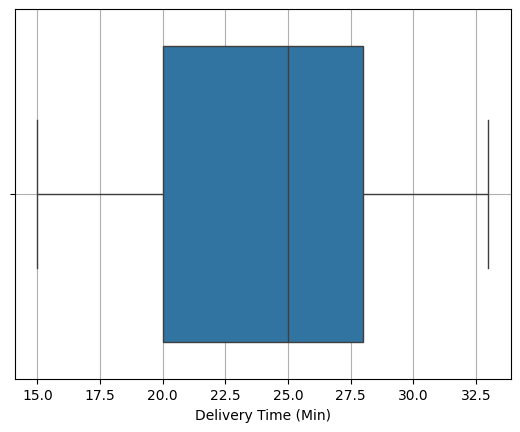

In [ ]:
# (9) Delivery Time
target_col = 'delivery_time'
print(df[target_col].describe())
print()

sns.histplot(data=df, x=target_col, kde=True)
xlabel = ' '.join(target_col.split('_')).title() + ' (Min)'
plt.xlabel(xlabel)
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

sns.boxplot(data=df, x=target_col)
plt.xlabel(xlabel)
plt.grid(True)
plt.show()

###Observations on Delivery Time
- The average delivery time is 24.2-minutes
- The median delivery time is 25-minutes
- The delivery times range from 15-minutes to 33-minutes
- The data is somewhat uniformly distributed with a very slight left skew

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Get the total number of orders for each restaurant and take the top 5 results
top_5_restaurants = df['restaurant_name'].value_counts().iloc[:5]

# Print answer
print(top_5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


1.   Shake Shack: 219 orders
2.   The Meatball Shop: 132 orders
3.   Blue Ribbon Sushi: 119 orders
4.   Blue Ribbon Fried Chicken: 96 orders
5.   Parm: 68 orders





### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Group the dataframe and extract the sorted order totals for each cuisine on weekends
weekend_cuisines = df.groupby('day_of_the_week')['cuisine_type'].value_counts()['Weekend']

# The most popular weekend cuisine is the index of the top row
most_popular_cuisine = weekend_cuisines.index[0]

# Print answer
print(f'The most popular cuisine on the weekends is {most_popular_cuisine}')


The most popular cuisine on the weekends is American


#### Observations:
- The most popular cuisine on the weekends is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Get the number of rows where the 'cost_of_the_order' is > $20 and compare to initial size
over_20_percentage = 100 * df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0]

# Print answer
print(f'{over_20_percentage:.2f}% of orders cost more than $20')

29.24% of orders cost more than $20


#### Observations:
- 29.24% of orders cost more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Straight-forward average
mean_delivery_time = df['delivery_time'].mean()

# Print answer
print(f'The average delivery time is {mean_delivery_time:.2f} minutes')

The average delivery time is 24.16 minutes


#### Observations:
- The average delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Grab the total orders of the top 3 customers
top_3_customers = df['customer_id'].value_counts().iloc[:3]

# Loop through the series and print nicely to the screen
for i, num_orders in enumerate(top_3_customers):
  customer_id = top_3_customers.index[i]
  print(f'({i+1}) Customer ID {customer_id} placed {num_orders} orders')

(1) Customer ID 52832 placed 13 orders
(2) Customer ID 47440 placed 10 orders
(3) Customer ID 83287 placed 9 orders


#### Observations:
1.   Customer ID 52832 placed 13 orders
2.   Customer ID 47440 placed 10 orders
3.   Customer ID 83287 placed 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


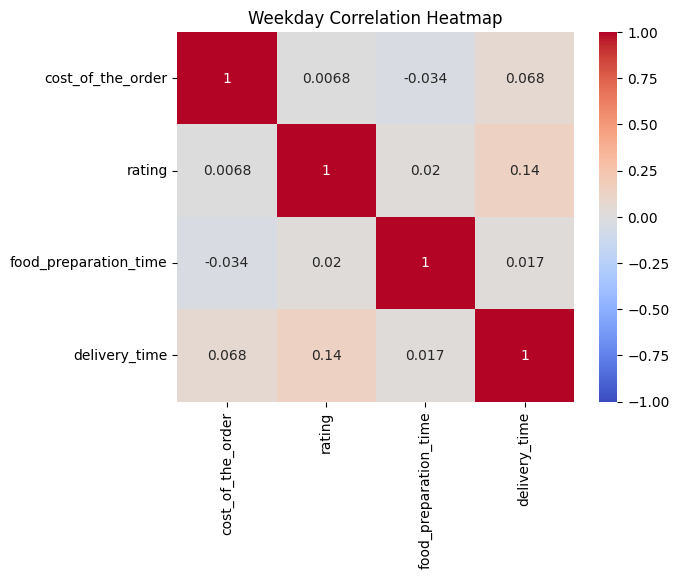

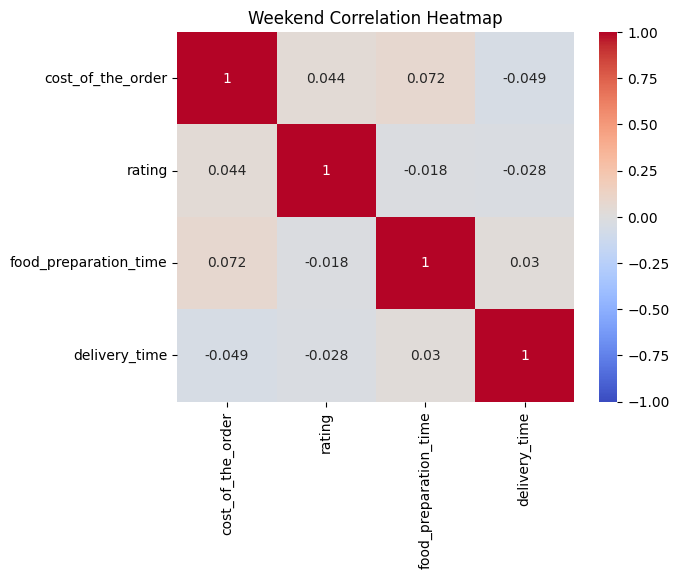

In [ ]:
# Begin with an exploratory correlation heatmap
corr_vars = [
    'cost_of_the_order',
    'rating',
    'food_preparation_time',
    'delivery_time',
]

grouped_df = df.groupby('day_of_the_week')
for name, group in grouped_df:
  sns.heatmap(
      data=group[corr_vars].corr(numeric_only=True),
      annot=True,
      cmap='coolwarm',
      vmin=-1,
      vmax=1
      )
  plt.title(f'{name} Correlation Heatmap')
  plt.show()

###Observations
- No strong correlation is observed between numeric columns
- On weekdays, a *very* slight positive correlation is observed between the rating and the delivery time

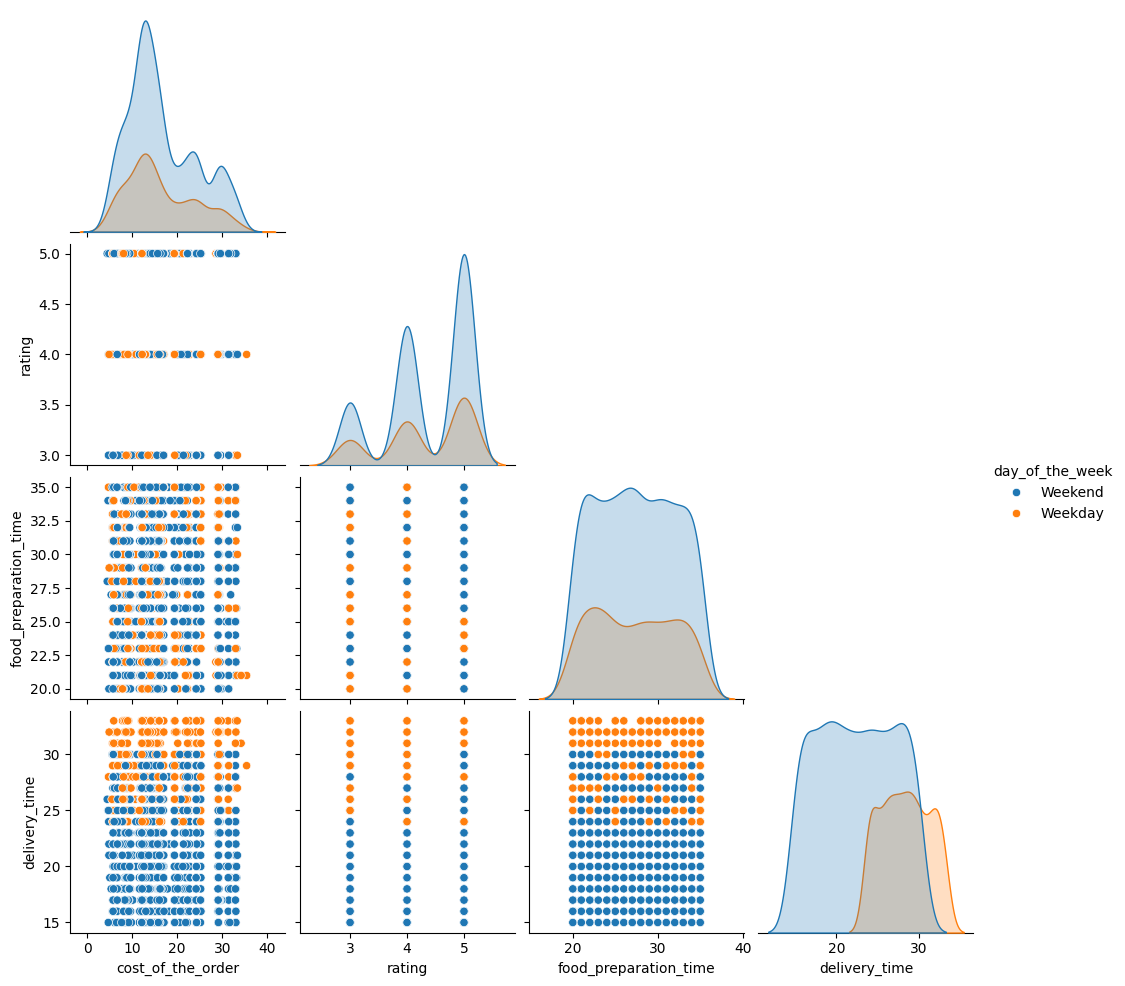

In [ ]:
# Observe the distributions of all correlation variables over the day_of_the_week category
sns.pairplot(data=df, vars=corr_vars, hue='day_of_the_week', corner=True)
plt.show()

###Observations
- Order cost, rating, and food preparation time all have similar distributions for both weekends and weekdays
- The delivery times on weekdays are generally longer than on weekends

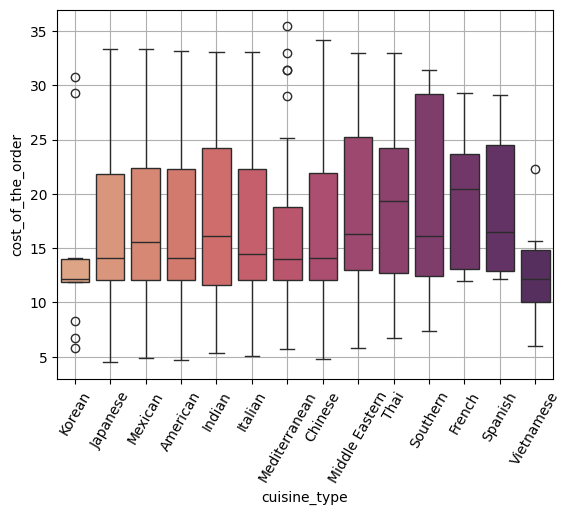

In [ ]:
# Does the cost depend on the type of cuisine?
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', palette='flare')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

###Observations
- The cost of the order is not strongly correlated with the type of cuisine
- Most cuisines have a median cost of around \$15
- Thai and French cuisines tend to be more expensive
- Vietnamese food tends to be less expensive

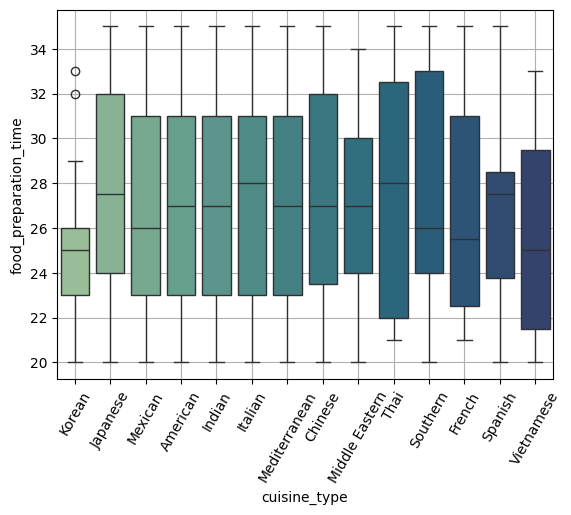

In [ ]:
# Does the preparation time depend on the type of cuisine?
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', hue='cuisine_type', palette='crest')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

###Observations
- The food preparation time is not strongly correlated with the type of cuisine
- Most cuisine types have a median preparation time of around 27-minutes
- Japanese, Italian, Thai, and Spanish food tend to take longer time to prepare
- Korean, French, and Vietnamese food tend to take less time to prepare

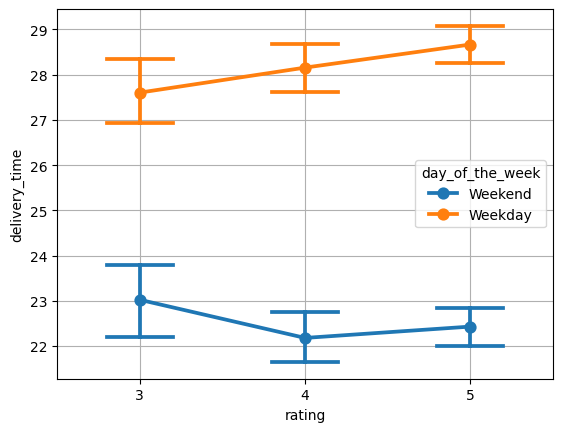

In [ ]:
# Does the rating depend on the delivery time?
h = sns.pointplot(data=df, x='rating', y='delivery_time', hue='day_of_the_week', capsize=0.4)
h.set_xticks(h.get_xticks())  # Only required to suppress warning
h.set_xticklabels([int(float(x.get_text())) for x in h.get_xticklabels()])
plt.grid(True)
plt.show()

###Observations
- On weekdays, there is a clear positive correlation between rating and delivery time
- On weekdays, there is less of a correlation

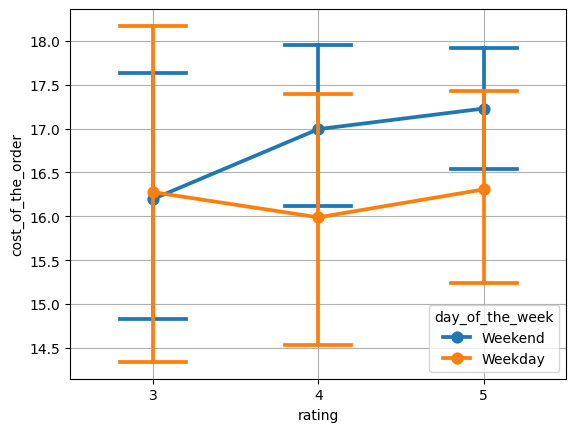

In [ ]:
# Does the rating depend on the order cost?
h = sns.pointplot(data=df, x='rating', y='cost_of_the_order', hue='day_of_the_week', capsize=0.4)
h.set_xticks(h.get_xticks())  # Only required to suppress warning
h.set_xticklabels([int(float(x.get_text())) for x in h.get_xticklabels()])
plt.grid(True)
plt.show()

###Observations
- On weekends, there is a slight positive correlation between rating and order cost
- On weekdays, there is less of a correlation

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Create a container to populate with qualified establishments
qualified_restaurants = []

# Loop through all the unique restaurants in the dataset
for restaurant_name in df['restaurant_name'].unique():

  # For each restaurant grab the count and mean of the 'rating' column
  stats = df[df['restaurant_name'] == restaurant_name]['rating'].describe()
  num_ratings = stats.loc['count']
  avg_rating = stats.loc['mean']

  # If the restaurant qualifies for the promotion, add them to the list
  if num_ratings > 50 and avg_rating > 4:
    qualified_restaurants.append((restaurant_name, avg_rating, num_ratings))

# Sort the list by rating in descending order
qualified_restaurants = sorted(qualified_restaurants, key=lambda x: x[1], reverse=True)

# Print the qualifing restaurants to the console
n_dash = 59
print('-' * n_dash)
print(f'|  {"RESTAURANT_NAME".center(25)}  |  {"MEAN_RATING"}  |  {"REVIEWS"}  |')
print('-' * n_dash)
for i, (name, rating, reviews) in enumerate(qualified_restaurants, start=1):
  print(f'|  {name.center(25)}  |  {rating:11.1f}  |  {int(reviews):7}  |')
print('-' * n_dash)

-----------------------------------------------------------
|       RESTAURANT_NAME       |  MEAN_RATING  |  REVIEWS  |
-----------------------------------------------------------
|      The Meatball Shop      |          4.5  |       84  |
|  Blue Ribbon Fried Chicken  |          4.3  |       64  |
|         Shake Shack         |          4.3  |      133  |
|      Blue Ribbon Sushi      |          4.2  |       73  |
-----------------------------------------------------------


#### Observations:
#### The following four restaurants qualify for the promotion:
1.   The Meatball Shop has an average rating of 4.5 stars (84 reviews)
2.   Blue Ribbon Fried Chicken has an average rating of 4.3 stars (64 reviews)
3.   Shake Shack has an average rating of 4.3 stars (133 reviews)
4.   Blue Ribbon Sushi has an average rating of 4.2 stars (73 reviews)

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Define a custom function to calculate a given service fee
def service_fee(order_cost: float) -> float:
  """
  This function computes the service fee for a given order
  """
  if order_cost > 20:
    fee = 0.25
  elif order_cost > 5:
    fee = 0.15
  else:
    fee = 0
  return order_cost * fee

# Create a new calculated column using the service_fee function
df['service_fee'] = df['cost_of_the_order'].apply(service_fee)

# Compute the total revenue
total_revenue = df['service_fee'].sum()

# Print answer
print(f'The total revenue for all orders is ${total_revenue:.2f}')

The total revenue for all orders is $6166.30


#### Observations:
- The total revenue for all orders is $6,166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Create a new calculated column which is the sum of the prep and delivery times
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Compute the percentage of orders that take longer than 60-min total
over_60_percentage = 100 * df[df['total_time'] > 60].shape[0] / df.shape[0]

# Print answer
print(f'{over_60_percentage:.2f}% of orders take longer than 60-min to prepare and deliver')

10.54% of orders take longer than 60-min to prepare and deliver


#### Observations:
- 10.5% of orders take longer than 60-min to prepare and deliver

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Group the dataset by 'day_of_the_week' and get the statistical breakdown
stats = df.groupby('day_of_the_week')['delivery_time'].describe()

# Print stats
print(stats)

# Compute the average difference in delivery times
mean_diff = abs(stats.loc['Weekday'].loc['mean'] - stats.loc['Weekend'].loc['mean'])
if stats.loc['Weekday'].loc['mean'] > stats.loc['Weekend'].loc['mean']:
  longer_day = 'Weekday'
else:
  longer_day = 'Weekend'

# Print answer
print(f'\nThe average delivery time is longer on {longer_day.lower()}s by {mean_diff:.2f} minutes')

                  count       mean       std   min   25%   50%   75%   max
day_of_the_week                                                           
Weekday           547.0  28.340037  2.891428  24.0  26.0  28.0  31.0  33.0
Weekend          1351.0  22.470022  4.628938  15.0  18.5  22.0  27.0  30.0

The average delivery time is longer on weekdays by 5.87 minutes


#### Observations:
- The average delivery time is longer on weekdays by 5.87 minutes




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* Japanese, American, Italian, and Chinese cuisines make up the majority of orders in our area
* The order cost, order rating, and food preparation time have similarly shaped, overlapping distributions between weekends and weekdays. The distributions of delivery times have similar shapes over weekends and weekdays, but the distribution on weekdays is shifted towards the higher end of the spectrum
* On weekdays, customers appear to value faster delivery times more than they do on the weekends.
* On weekends, customers slightly tend to give higher ratings to more expensive orders.

### Recommendations:

Our profit comes directly from the service fee we charge to the restaurant. This service fee is based solely off the cost of the order. Therefore, to maximize profits we need to help restaurants pull-off larger orders. Customers are more likely to place large orders at highly-rated establishments. Thus, our profits are tied to the success of the restaurants we host on our platform. We can help raise restaurant ratings by lowering the total time required to prepare and deliver orders as well as selectivly promote cusinises that are popular in a given area. One way to reduce total process time is to hire more delivery drivers for weekdays in particular. Presently, customers are experiencing significantly longer delivery times on weekdays. Making up this gap could result in more orders from folks looking to get something fast and easy after work/school. We should prioritize promoting restaurants with higher cost orders as these establishments will yield the 15% and 25% service fees which directly increase revenue. Finally, Japanese, American, Italian, and Chinese cuisines make up the majority of orders in our area. Promoting these cuisines to customers while they browse the app may result in a higher number of orders placed.

---